In [68]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [52]:
# column names are width and length
df = pd.read_csv("./datasets/seeds.csv", names = ["width", "length"])
df.head()

,,,,,,width,length
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [53]:
data = df.values.tolist()

In [54]:
inertias = []
for k in np.arange(1,11):
  model = KMeans(n_clusters=k, n_init="auto")
  model.fit(data)
  inertias.append(model.inertia_)

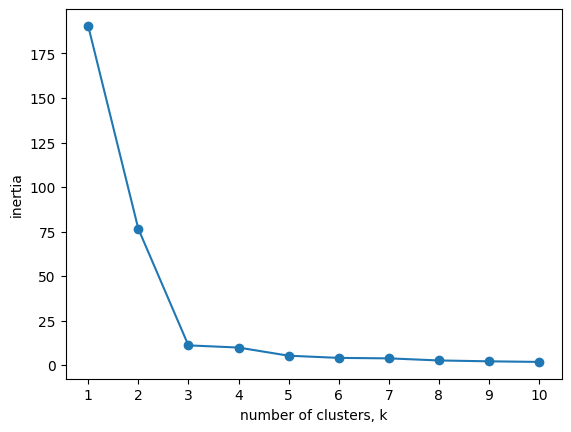

In [55]:
plt.plot(np.arange(1,11), inertias, marker='o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(np.arange(1,11))
plt.show()

# KMeans with Pipeline

In [56]:
samples = [
  [ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
  [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
  [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
  [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
  [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
  [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
  [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
  [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
  [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
  [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
  [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
  [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
  [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
  [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
  [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
  [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
  [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
  [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
  [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
  [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
  [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
  [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
  [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
  [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
  [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
  [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
  [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
  [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
  [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
  [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
  [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
  [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
  [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
  [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
  [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
  [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
  [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
  [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
  [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
  [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
  [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
  [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
  [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
  [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
  [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
  [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
  [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
  [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
  [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
  [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
  [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
  [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
  [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
  [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
  [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
  [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
  [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
  [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
  [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
  [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
  [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
  [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
  [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
  [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
  [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
  [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
  [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
  [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
  [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
  [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
  [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
  [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
  [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
  [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
  [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
  [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
  [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
  [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
  [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
  [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
  [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
  [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
  [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
  [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
  [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]
]

# labels = [
#   3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
#   3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#   3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
# ]

species = [
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 
  'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 
  'Bream', 'Bream', 'Bream', 'Bream', 'Roach', 
  'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 
  'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 
  'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 
  'Roach', 'Roach', 'Roach', 'Roach', 'Smelt', 
  'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 
  'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 
  'Smelt', 'Smelt', 'Smelt', 'Pike', 'Pike', 
  'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 
  'Pike', 'Pike', 'Pike', 'Pike', 'Pike', 
  'Pike', 'Pike', 'Pike', 'Pike', 'Pike'
]

In [57]:
scaler = StandardScaler()

kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(samples)

labels = pipeline.predict(samples)

/Users/johnbjohn/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
df = pd.DataFrame({"labels": labels, "species": species})

ct = pd.crosstab(df['labels'], df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,1,0,19,1
1,0,17,0,0
2,33,0,1,0
3,0,0,0,13


# KMeans with Dendrogram

In [59]:
samples = [
  [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
  [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
  [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
  [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
  [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
  [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
  [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
  [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
  [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
  [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
  [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
  [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
  [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
  [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
  [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
  [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
  [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
  [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
  [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
  [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
  [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
  [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
  [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
  [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
  [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
  [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
  [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
  [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
  [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
  [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
  [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
  [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
  [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
  [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
  [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
  [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
  [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
  [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
  [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
  [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
  [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
  [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]
]

varieties = [
  'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 
  'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 
  'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 
  'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 
  'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 
  'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 
  'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 
  'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 
  'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat'
]

In [60]:
len(samples)

42

In [61]:
mergings.shape

(41, 4)

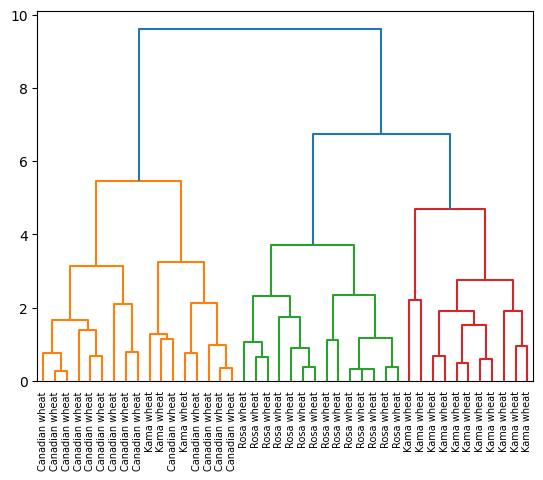

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import pandas as pd

mergings = linkage(samples, method='complete')

dendrogram(
  mergings,
  labels = varieties,
  leaf_rotation = 90,
  leaf_font_size = 7
)

plt.show()

In [63]:
labels = fcluster(mergings, 6, criterion='distance')

df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


# Clustering using t-SNE

## 1. Grain Seeds

In [64]:
seeds = pd.read_csv("./datasets/seeds.csv", header=None)
samples = np.array(seeds.iloc[:, :-1].values.tolist())
variety_numbers = np.array(seeds.iloc[:, -1].values.tolist())

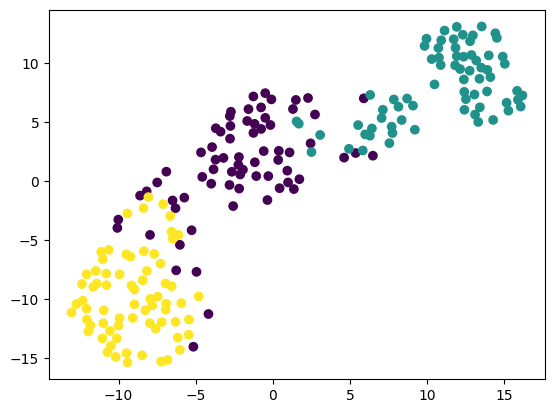

In [65]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(samples)

xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

plt.scatter(
  xs,
  ys,
  c=variety_numbers
)
plt.show()

## 2. Stock Movements

In [66]:
stocks = pd.read_csv('./datasets/stocks.csv')
movements = np.array(
  stocks.iloc[:, 1:].values.tolist()
)
companies = np.array(
  stocks.iloc[:, 0].values.tolist()
)
normalized_movements = normalize(movements)

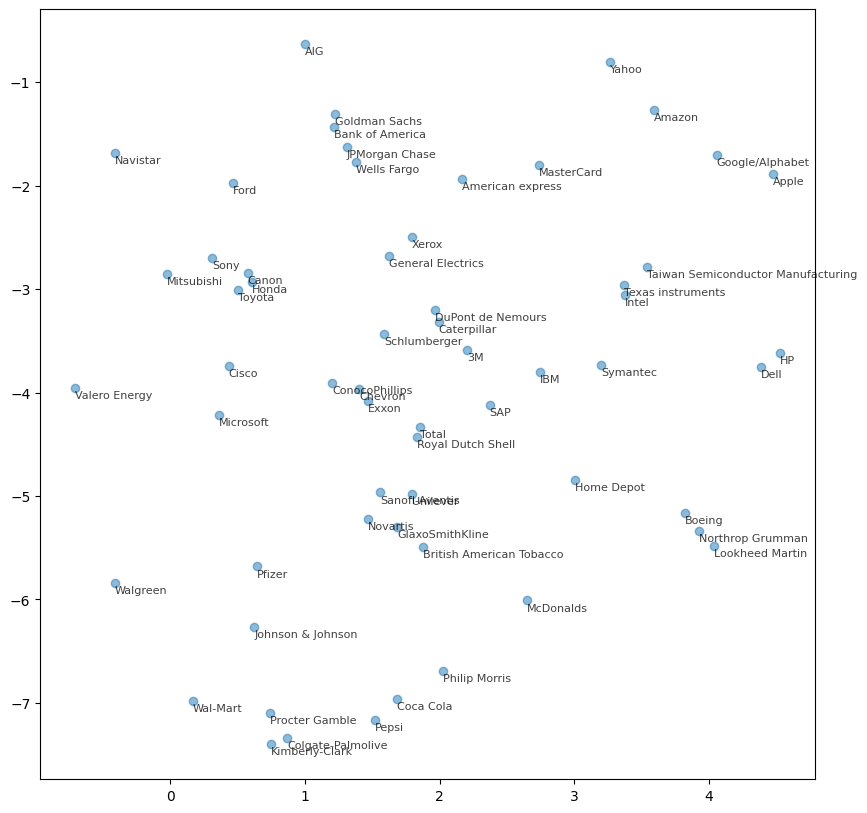

In [67]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

# increase figure size
figure = plt.figure(figsize=(10, 10))

plt.scatter(
  xs,
  ys,
  alpha = 0.5
)

for x, y, company in zip(xs,ys,companies):
  plt.annotate(company, (x,y-0.1), fontsize=8, alpha=0.75)

plt.show()

# Principal Component Analysis

In [69]:
seeds[0]

0      15.26
1      14.88
2      14.29
3      13.84
4      16.14
       ...  
205    12.19
206    11.23
207    13.20
208    11.84
209    12.30
Name: 0, Length: 210, dtype: float64

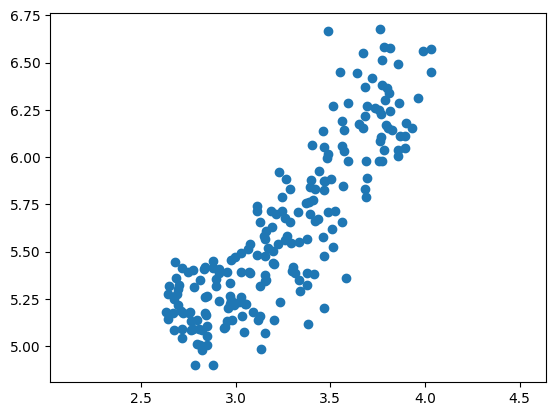

In [77]:
grains = np.array(pd.read_csv("./datasets/seeds-width-vs-length.csv").values)
width = grains[:, 0]
length = grains[:, 1]

plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [83]:
correlation, pvalue = pearsonr(width, length)
correlation

0.8604405325922299

The correlation value is above 0.86, and we can tell that the two variables are highly correlated. Meaning if one variable increases, the other variable increases as well. This can also be a problem called multicollinearity.

What is Multicollinearity?
Multicollinearity is when there is a strong correlation between independent variables. In other words, two or more independent variables are highly correlated with each other. This is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit a machine learning model and interpret the results.

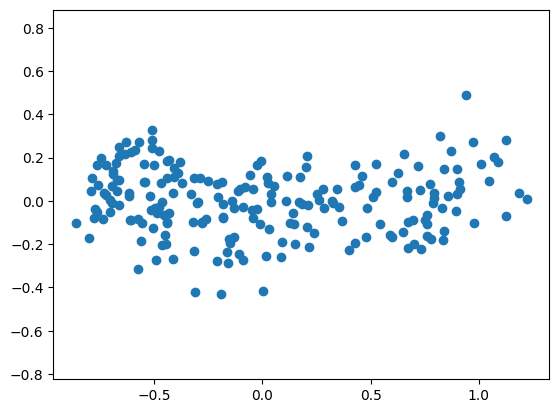

In [80]:
model = PCA()

pca_features = model.fit_transform(grains)

xs = pca_features[:, 0]
ys = pca_features[:, 1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [81]:
correlation, pvalue = pearsonr(xs, ys)
correlation

-2.65391749214776e-16

Thus, we have successfully decorrelated these two variables using PCA. We can see that the correlation value above is very low, meaning that the variables are not correlated.

# Intrinsic Dimension

Intrinsic dimension is the number of features needed to approximate the dataset. It can be found by counting the number of dimensions that have significant variance, and it can be detected using PCA.

Given a dataset containing 2 feaures, longitude and latitude, we can plot the dataset and see that it is a line. Thus, the intrinsic dimension is 1.

Intrinsic dimension = number of PCA features with significant variance

In [90]:
model = PCA()

model.fit(grains)

mean = model.mean_

first_pc = model.components_[0, :]
second_pc = model.components_[1, :]

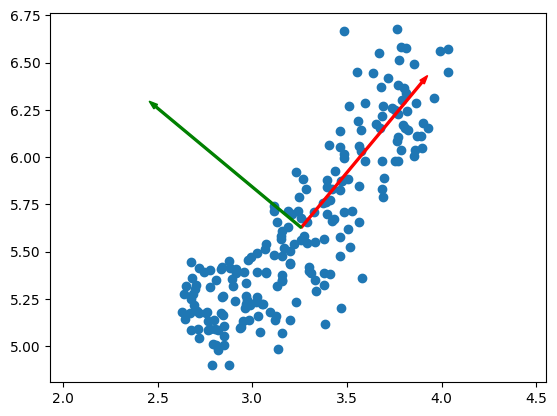

In [91]:
plt.scatter(width, length)

plt.arrow(
  mean[0],
  mean[1],
  first_pc[0],
  first_pc[1],
  color = 'red', 
  width = 0.01
)

plt.arrow(
  mean[0],
  mean[1],
  second_pc[0],
  second_pc[1],
  color = 'green', 
  width = 0.01
)

plt.axis('equal')
plt.show()

# Plot PCA features variance

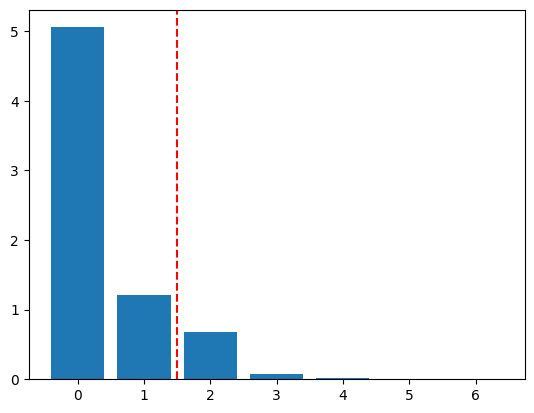

In [94]:
scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)

pipeline.fit(samples)

features = range(pipeline['pca'].n_components_)
plt.bar(features, pipeline['pca'].explained_variance_)
plt.axvline(1.5, linestyle='--', color='red')
plt.xticks(features)
plt.show()

We can see that the first two features have significant variance, while the third feature has very low variance. Thus, the intrinsic dimension is 2.

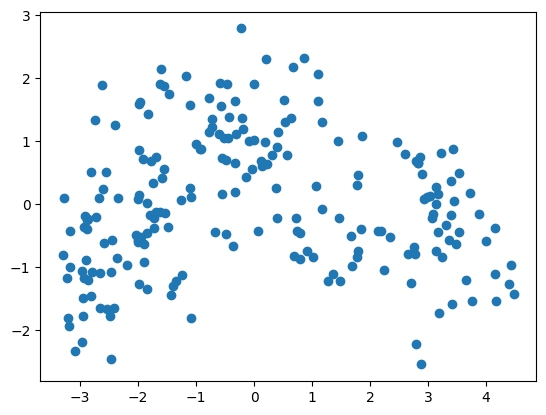

In [97]:
scaled_samples = scaler.fit_transform(samples)

pca = PCA(n_components=2)
pca.fit(scaled_samples)

pca_features = pca.transform(scaled_samples)

plt.scatter(pca_features[:, 0], pca_features[:, 1])

In [113]:
print(df[df.duplicated()])

    labels       varieties
1        3      Kama wheat
2        3      Kama wheat
3        3      Kama wheat
4        3      Kama wheat
6        3      Kama wheat
7        3      Kama wheat
8        1      Kama wheat
9        3      Kama wheat
10       3      Kama wheat
11       3      Kama wheat
12       1      Kama wheat
13       3      Kama wheat
15       2      Rosa wheat
16       2      Rosa wheat
17       2      Rosa wheat
18       2      Rosa wheat
19       2      Rosa wheat
20       2      Rosa wheat
21       2      Rosa wheat
22       2      Rosa wheat
23       2      Rosa wheat
24       2      Rosa wheat
25       2      Rosa wheat
26       2      Rosa wheat
27       2      Rosa wheat
29       1  Canadian wheat
30       1  Canadian wheat
31       1  Canadian wheat
32       1  Canadian wheat
33       1  Canadian wheat
34       1  Canadian wheat
35       1  Canadian wheat
36       1  Canadian wheat
37       1  Canadian wheat
38       1  Canadian wheat
39       1  Canadian wheat
4